<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.2 
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

In [86]:
sns.set_context('talk')
sns.set_style('whitegrid')

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [87]:
#ANSWER:
bikes = pd.read_table('C:/Users/peter/Desktop/DOI - Mai/data/bikeshare.csv', header = 0, sep = ',')
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [89]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [90]:
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

In [9]:
data = bikes.sample(100)

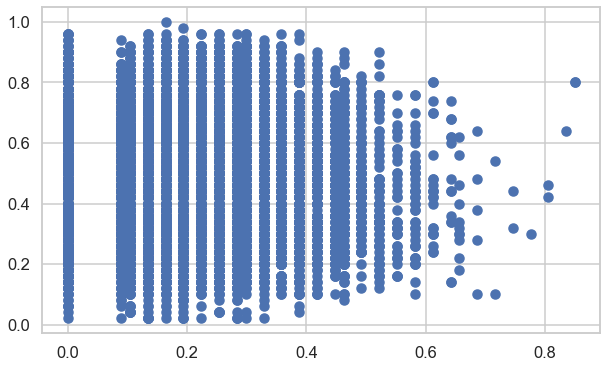

In [92]:
#ANSWER scatter
plt.scatter(x=bikes['windspeed'], y=bikes['temp'])



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='windspeed', ylabel='temp'>

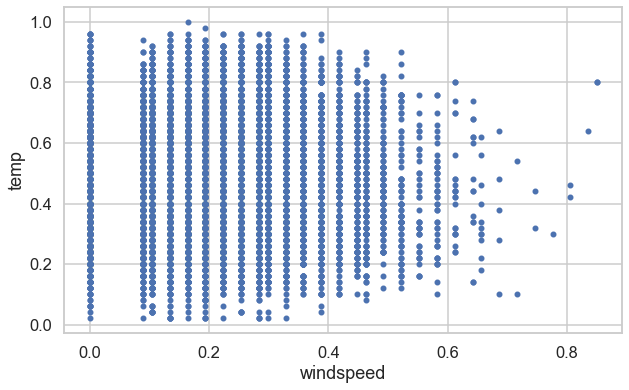

In [94]:
#or
bikes.plot.scatter('windspeed','temp')

(0.2, 0.6)

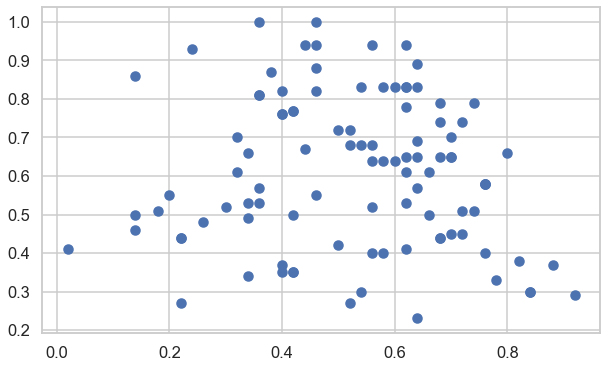

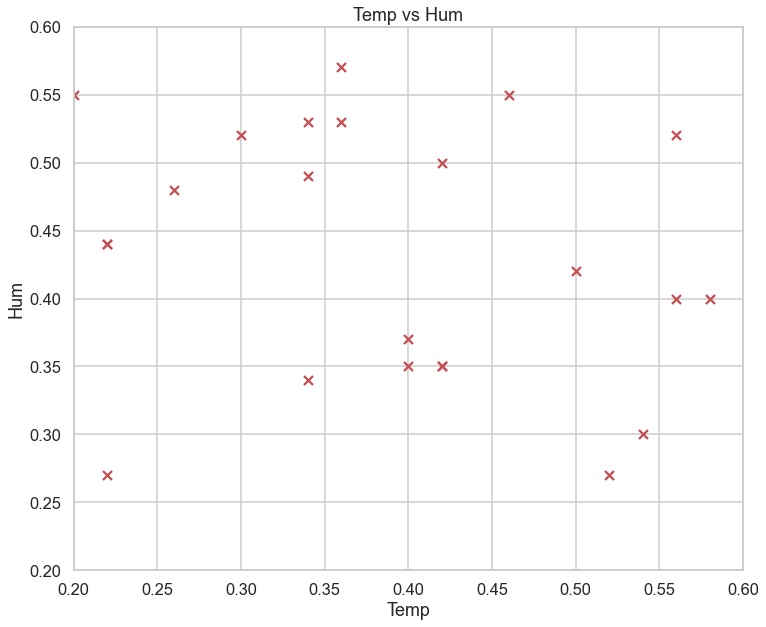

In [95]:
#another example
plt.scatter(x=data['temp'], y=data['hum'])

# OR
plt. figure(figsize=(12,10)) #change size of map

plt.scatter(x=data['temp'], y=data['hum'], marker='x', color='r')
plt.xlabel('Temp') #title of x
plt.ylabel('Hum') #title of y
plt.title('Temp vs Hum') #title of chart
plt.xlim(0.2,0.6) #to limit the data
plt.ylim(0.2,0.6) #to limit the data

<AxesSubplot:xlabel='hr', ylabel='temp'>

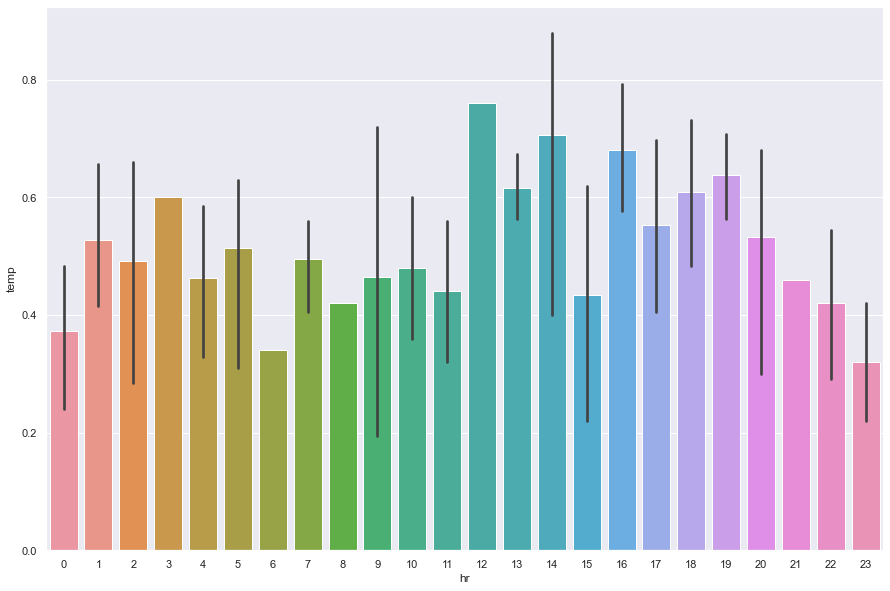

In [11]:
# Barplot

plt.figure(figsize=(15,10))
sns.barplot(x='hr', y='temp', data=data)

<AxesSubplot:xlabel='hr', ylabel='temp'>

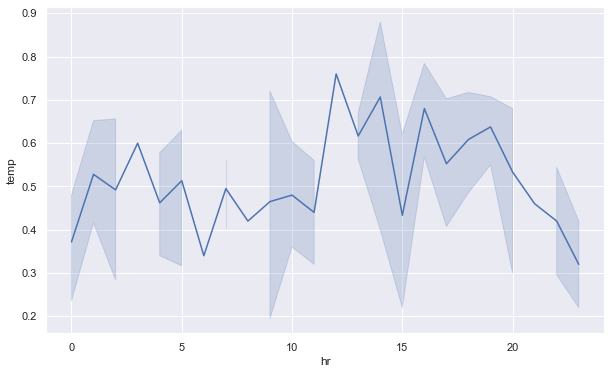

In [12]:
#Lineplot

sns.lineplot(x='hr', y='temp', data=data)

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)

x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

c : color, sequence, or sequence of color, optional
    The marker color. Possible values:
        -A single color format string.
        -A sequence of color specifications of length n.
        -A sequence of n numbers to be mapped to colors using cmap and norm.
        -A 2-D array in which the rows are RGB or RGBA.
    Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. If you want to specify the same RGB or RGBA value for all points, use a 2-D array with a single row. Otherwise, value- matching will have precedence in case of a size matching with x and y.
    Defaults to None. In that case the marker color is determined by the value of color, facecolor or facecolors. In case those are not specified or None, the marker color is determined by the next color of the Axes' current "shape and fill" color cycle. This cycle defaults to rcParams["axes.prop_cycle"].

marker : MarkerStyle, optional
    The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. Defaults to None, in which case it takes the value of rcParams["scatter.marker"] = 'o'. https://matplotlib.org/3.1.0/api/markers_api.html#module-matplotlib.markers

cmap : Colormap, optional, default: None
    A Colormap instance or registered colormap name. cmap is only used if c is an array of floats. If None, defaults to rc image.cmap.

norm : Normalize, optional, default: None
    A Normalize instance is used to scale luminance data to 0, 1. norm is only used if c is an array of floats. If None, use the default colors.Normalize.

vmin, vmax : scalar, optional, default: None
    vmin and vmax are used in conjunction with norm to normalize luminance data. If None, the respective min and max of the color array is used. vmin and vmax are ignored if you pass a norm instance.

alpha : scalar, optional, default: None
    The alpha blending value, between 0 (transparent) and 1 (opaque).

linewidths : scalar or array_like, optional, default: None
    The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well. If None, defaults to rcParams lines.linewidth.

edgecolors : {'face', 'none', None} or color or sequence of color, optional.
    The edge color of the marker. Possible values:
        -'face': The edge color will always be the same as the face color.
        -'none': No patch boundary will be drawn.
        - A Matplotlib color or sequence of color.
    Defaults to None, in which case it takes the value of rcParams["scatter.edgecolors"] = 'face'.
    For non-filled markers, the edgecolors kwarg is ignored and forced to 'face' internally.

plotnonfinite : boolean, optional, default: False
    Set to plot points with nonfinite c, in conjunction with set_bad.


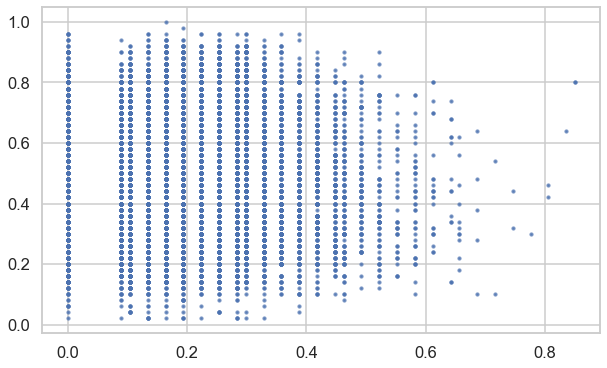

In [104]:
#ANSWER
plt.scatter(x=bikes['windspeed'], y=bikes['temp'], s=5, alpha=0.7, linewidths=2)

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for: 

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous varaibles**
- **Create histogram for those variables**

In [105]:
#ANSWER
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

(array([ 17.,  16.,  16.,  17.,  51.,  76., 138., 230., 155., 354., 421.,
        522., 559., 301., 641., 611., 645., 671., 372., 614., 548., 507.,
        559., 288., 531., 556., 569., 579., 305., 675., 726., 692., 693.,
        349., 690., 570., 516., 396., 169., 325., 213., 138., 131.,  53.,
         90.,  49.,  17.,  16.,   1.,   1.]),
 array([0.02  , 0.0396, 0.0592, 0.0788, 0.0984, 0.118 , 0.1376, 0.1572,
        0.1768, 0.1964, 0.216 , 0.2356, 0.2552, 0.2748, 0.2944, 0.314 ,
        0.3336, 0.3532, 0.3728, 0.3924, 0.412 , 0.4316, 0.4512, 0.4708,
        0.4904, 0.51  , 0.5296, 0.5492, 0.5688, 0.5884, 0.608 , 0.6276,
        0.6472, 0.6668, 0.6864, 0.706 , 0.7256, 0.7452, 0.7648, 0.7844,
        0.804 , 0.8236, 0.8432, 0.8628, 0.8824, 0.902 , 0.9216, 0.9412,
        0.9608, 0.9804, 1.    ]),
 <BarContainer object of 50 artists>)

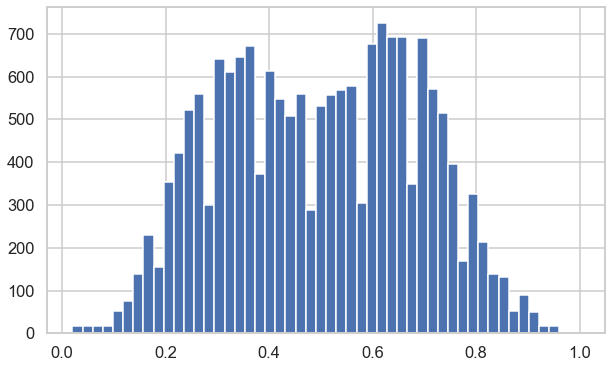

In [107]:
plt.hist(bikes.temp, bins = 50)

(array([ 117.,  953., 2444., 2913., 2433., 2684., 3150., 1976.,  625.,
          84.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <BarContainer object of 10 artists>)

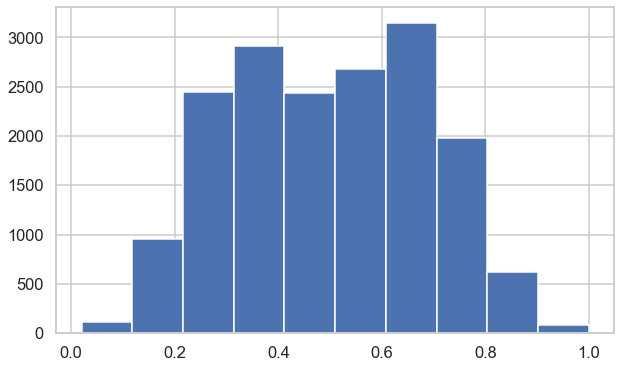

In [108]:
plt.hist(bikes.temp)

What do the horizontal and vertical axes represent?

#### ANSWER: 
    horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
    vertical = counts of samples in each bin.

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

<AxesSubplot:>

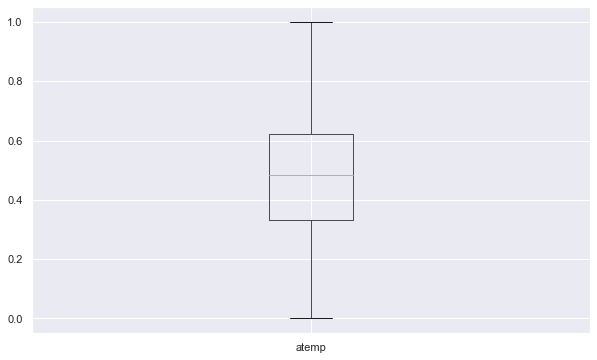

In [20]:
#ANSWER
bikes.boxplot(column = ['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x199da4518b0>,
 'caps': [<matplotlib.lines.Line2D at 0x199da451c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x199da5a6f10>],
 'medians': [<matplotlib.lines.Line2D at 0x199da436310>],
 'fliers': [<matplotlib.lines.Line2D at 0x199da436ee0>],
 'means': []}

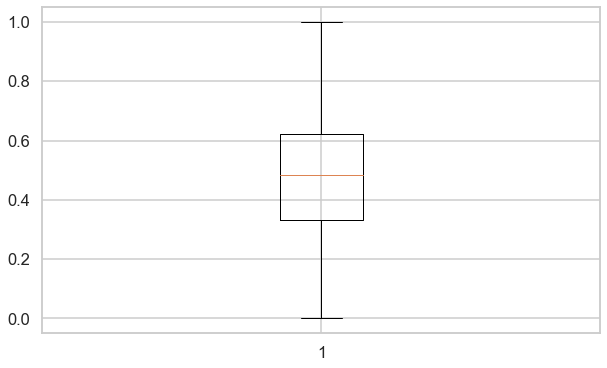

In [109]:
plt.boxplot(bikes['atemp'])

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). 

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

<AxesSubplot:>

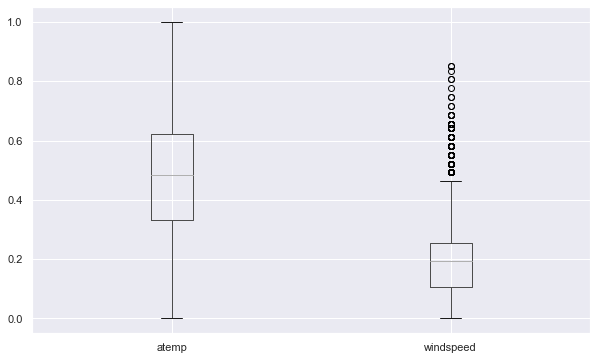

In [21]:
#ANSWER
bikes.boxplot(column = ['atemp','windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x199da394a00>,
 'caps': [<matplotlib.lines.Line2D at 0x199da44a400>,
 'boxes': [<matplotlib.lines.Line2D at 0x199da394fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x199da457850>,
 'fliers': [<matplotlib.lines.Line2D at 0x199da457c10>,
 'means': []}

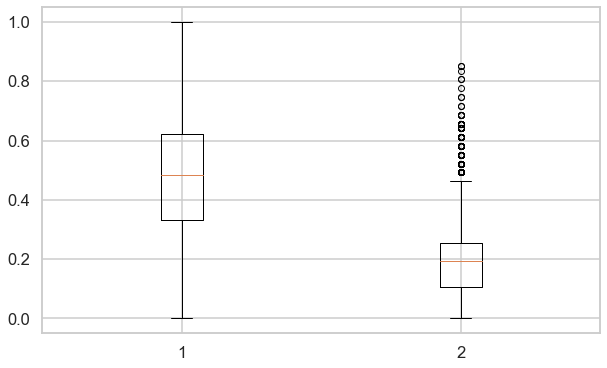

In [111]:
plt.boxplot(bikes[['atemp','windspeed']])

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [112]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh" 
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter = ",", 
                        names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [113]:
#ANSWER
iris_data.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [28]:
#ANSWER
iris_data.species.nunique() #disctinctt number of species: setosa,versicolor, verginica


3

In [115]:
iris_data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [33]:
iris_data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [43]:
#ANSWER
iris_data.species = pd.factorize(iris_data['species'])[0] + 1
iris_data.species

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [117]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`. 

**Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.**

In [38]:
#ANSWER 
iris_data.groupby(['sepal_length', 'sepal_width']).mean()


petal_length  petal_width
sepal_length sepal_width                           
4.3          3.0                   1.1          0.1
4.4          2.9                   1.4          0.2
             3.0                   1.3          0.2
             3.2                   1.3          0.2
4.5          2.3                   1.3          0.3
...                                ...          ...
7.7          2.6                   6.9          2.3
             2.8                   6.7          2.0
             3.0                   6.1          2.3
             3.8                   6.7          2.2
7.9          3.8                   6.4          2.0

[116 rows x 2 columns]

In [118]:
iris_data.groupby('sepal_length')[ 'sepal_width'].mean()

sepal_length
4.3    3.000000
4.4    3.033333
4.5    2.300000
4.6    3.325000
4.7    3.200000
4.8    3.180000
4.9    2.866667
5.0    3.120000
5.1    3.477778
5.2    3.425000
5.3    3.700000
5.4    3.550000
5.5    2.842857
5.6    2.816667
5.7    3.100000
5.8    2.885714
5.9    3.066667
6.0    2.733333
6.1    2.850000
6.2    2.825000
6.3    2.855556
6.4    2.957143
6.5    3.000000
6.6    2.950000
6.7    3.050000
6.8    3.000000
6.9    3.125000
7.0    3.200000
7.1    3.000000
7.2    3.266667
7.3    2.900000
7.4    2.800000
7.6    3.000000
7.7    3.050000
7.9    3.800000
Name: sepal_width, dtype: float64

In [51]:
#or 
iris_data.groupby('sepal_length').sepal_width.mean()

sepal_length
4.3    3.000000
4.4    3.033333
4.5    2.300000
4.6    3.325000
4.7    3.200000
4.8    3.180000
4.9    2.866667
5.0    3.120000
5.1    3.477778
5.2    3.425000
5.3    3.700000
5.4    3.550000
5.5    2.842857
5.6    2.816667
5.7    3.100000
5.8    2.885714
5.9    3.066667
6.0    2.733333
6.1    2.850000
6.2    2.825000
6.3    2.855556
6.4    2.957143
6.5    3.000000
6.6    2.950000
6.7    3.050000
6.8    3.000000
6.9    3.125000
7.0    3.200000
7.1    3.000000
7.2    3.266667
7.3    2.900000
7.4    2.800000
7.6    3.000000
7.7    3.050000
7.9    3.800000
Name: sepal_width, dtype: float64

In [119]:
iris_data.groupby('sepal_length').agg({ 'sepal_width':'mean'})

,sepal_width
sepal_length,
4.3,3.000000
4.4,3.033333
4.5,2.300000
4.6,3.325000
4.7,3.200000
4.8,3.180000
4.9,2.866667
5.0,3.120000
5.1,3.477778


array([[<AxesSubplot:title={'center':'sepal_width'}>]], dtype=object)

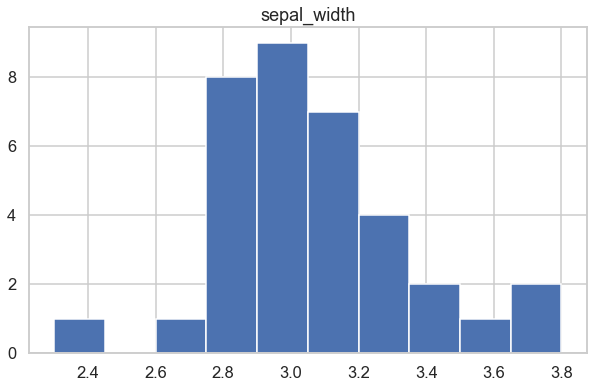

In [120]:
iris_data.groupby('sepal_length').agg({ 'sepal_width':'mean'}).hist()

The Pandas `plot` method provides a quick way to produce a scatter plot.

**Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

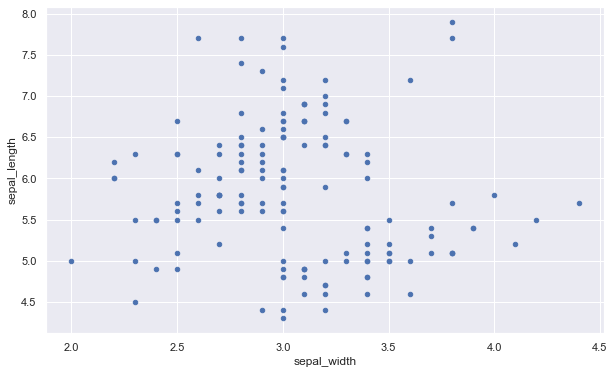

In [47]:
#ANSWER
iris_data.plot.scatter(x='sepal_width', y='sepal_length')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

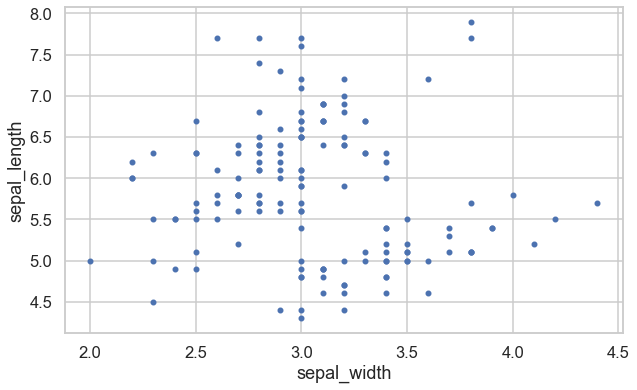

In [121]:
iris_data.plot(kind='scatter', x='sepal_width', y='sepal_length')

**Draw a Barplot showing sepal width and length using the Pandas plot method.**

<AxesSubplot:xlabel='sepal_width'>

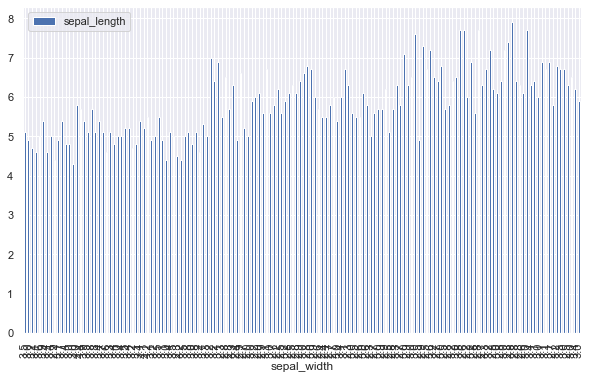

In [49]:
#ANSWER
iris_data.plot.bar(x='sepal_width', y='sepal_length')

<AxesSubplot:xlabel='sepal_width'>

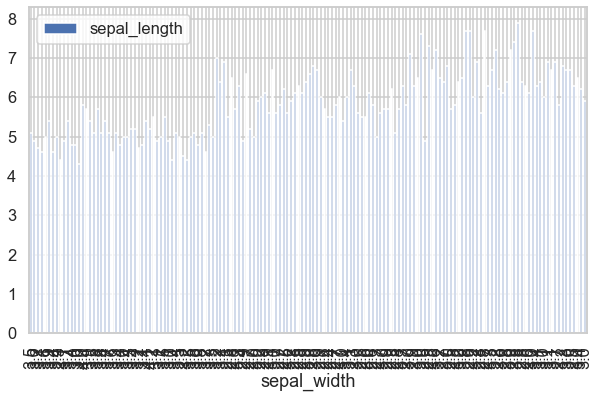

In [122]:
iris_data.plot(kind='bar', x='sepal_width', y='sepal_length')

Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Sepal width and Sepal length')

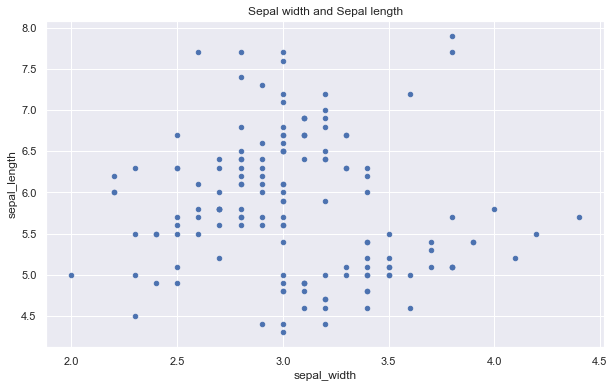

In [48]:
#ANSWER
iris_data.plot.scatter(x='sepal_width', y='sepal_length')
plt.xlabel('sepal_width') #title of x
plt.ylabel('sepal_length') #title of y
plt.title('Sepal width and Sepal length')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'SEPAL LENGTH')

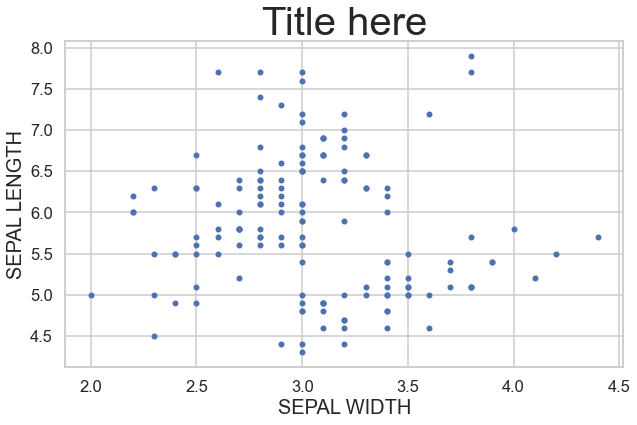

In [126]:
iris_data.plot(kind='scatter', x='sepal_width', y='sepal_length')
plt.title('Title here', fontdict={'fontsize':40})
plt.xlabel('SEPAL WIDTH', fontdict={'fontsize':20})
plt.ylabel('SEPAL LENGTH', fontdict={'fontsize':20})

In this dataset we have also `petal_width`, `petal_length`. 

**Try to draw Scatterplot using these variables.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

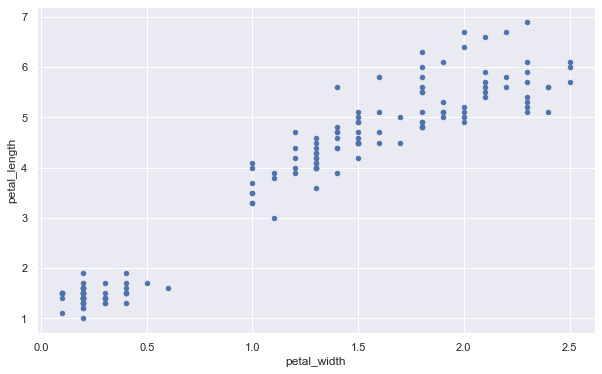

In [50]:
#ANSWER
iris_data.plot.scatter(x='petal_width', y='petal_length')

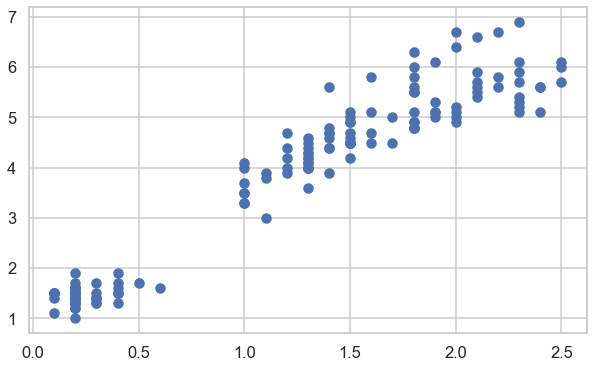

In [127]:
plt.scatter(iris_data.petal_width,iris_data.petal_length)

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

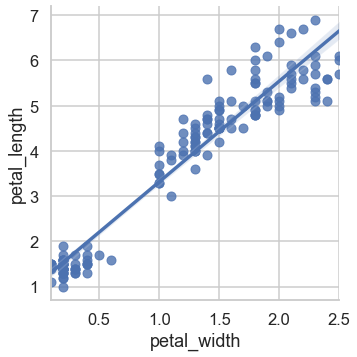

In [132]:
plt.figure(figsize(15,10))
sns.lmplot('petal_width','petal_length',data=iris_data, fit_reg=True)

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

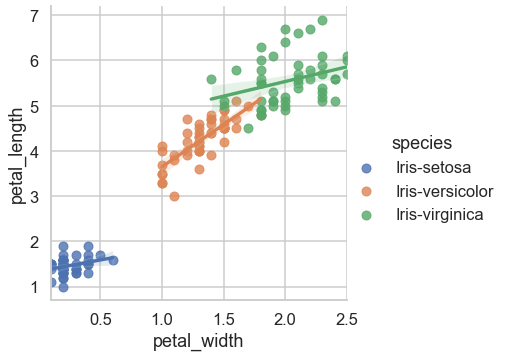

In [133]:
plt.figure(figsize(15,10))
sns.lmplot('petal_width','petal_length',data=iris_data,hue='species', fit_reg=True)

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

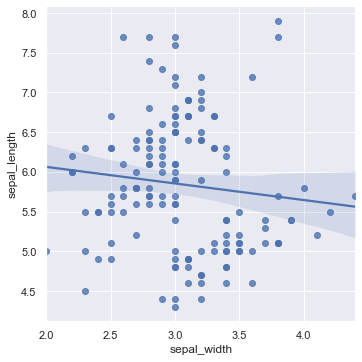

In [63]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(x='sepal_width', y='sepal_length',data=iris_data)

**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

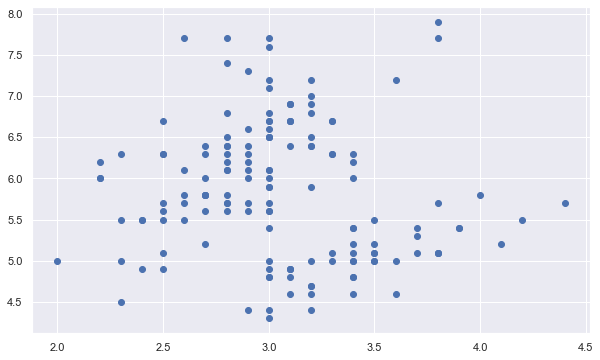

In [55]:
# ANSWER
plt.scatter(x=iris_data['sepal_width'], y=iris_data['sepal_length'])

To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

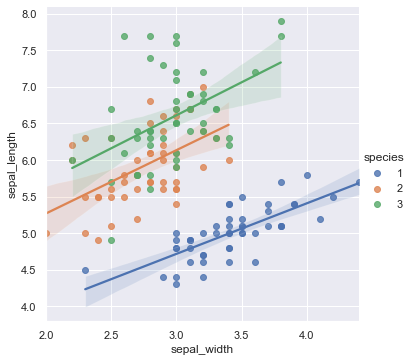

In [66]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(x='sepal_width', y='sepal_length',data=iris_data, hue = "species", fit_reg =True)

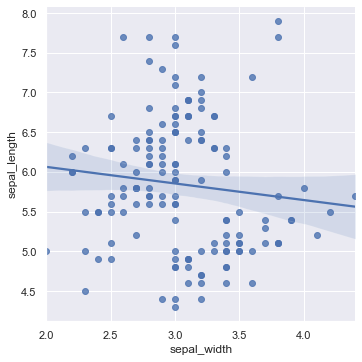

In [67]:
sns.lmplot(x='sepal_width', y='sepal_length',data=iris_data, fit_reg =True)

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

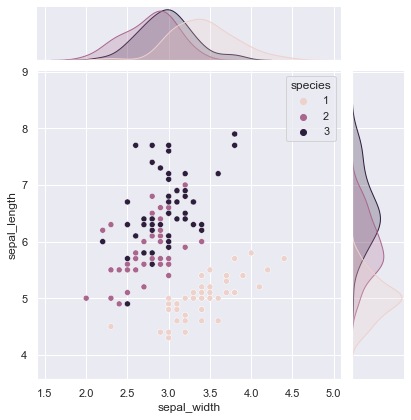

In [70]:
# ANSWER
sns.jointplot(data=iris_data, x='sepal_width', y='sepal_length', hue = "species")

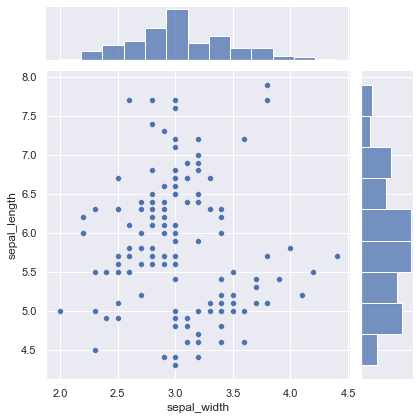

In [71]:
sns.jointplot(data=iris_data, x='sepal_width', y='sepal_length')

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

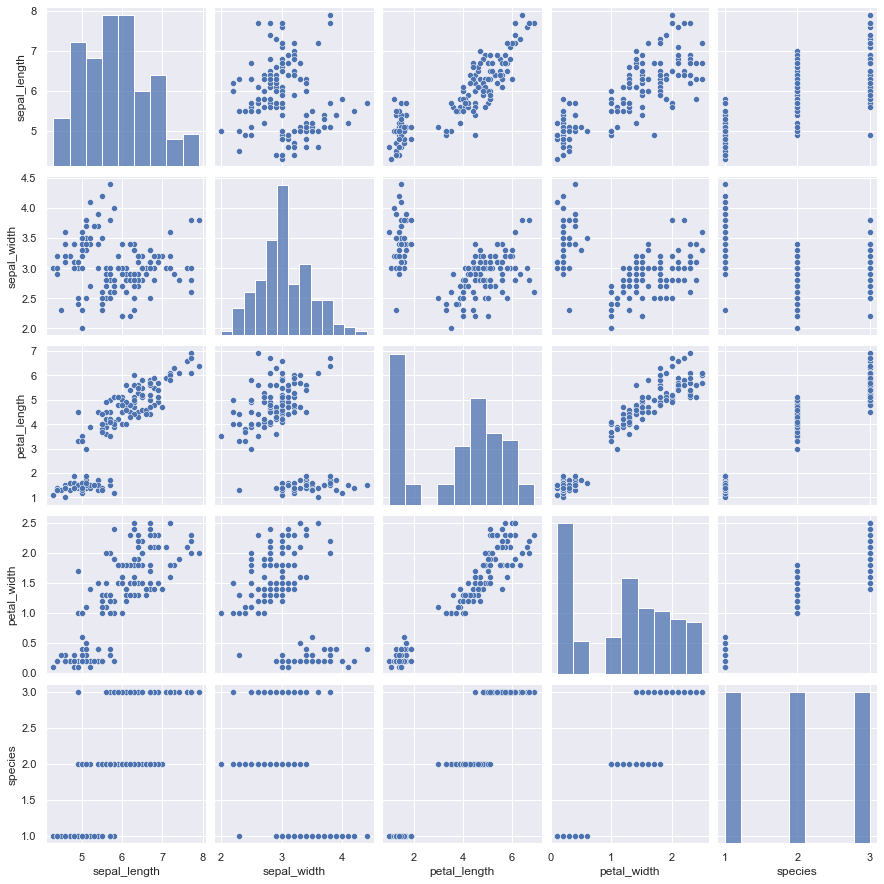

In [72]:
# ANSWER
sns.pairplot(iris_data)

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

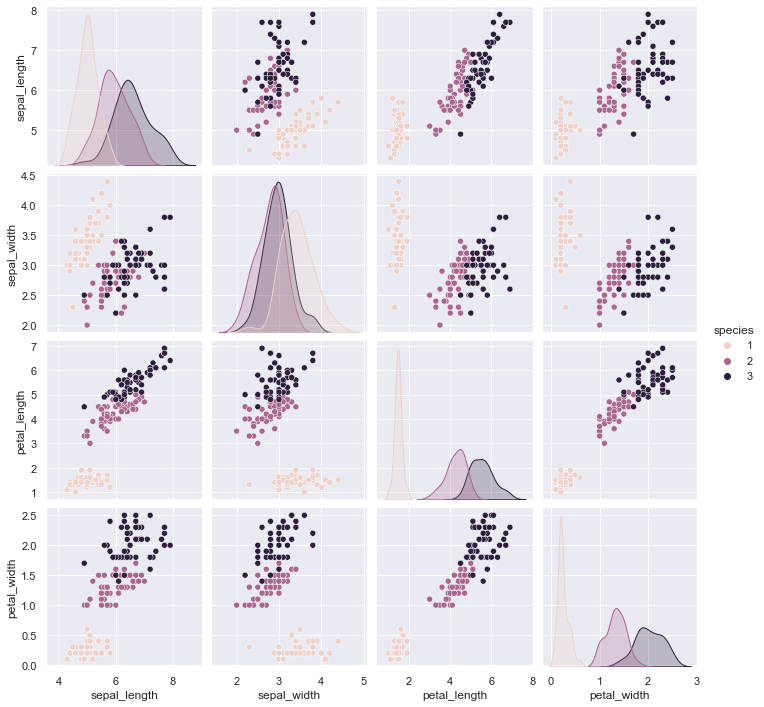

In [73]:
# ANSWER
sns.pairplot(iris_data, hue ="species")

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

ataFrame.corr(method='pearson', min_periods=1)
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
method{‘pearson’, ‘kendall’, ‘spearman’} or callable
Method of correlation:
    pearson : standard correlation coefficient
    kendall : Kendall Tau correlation coefficient
    spearman : Spearman rank correlation
    callable: callable with input two 1d ndarrays
         and returning a float. Note that the returned matrix from corr will have 1 along the diagonals and will be symmetric regardless of the callable’s behavior. New in version 0.24.0.

min_periodsint, optional
Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.

In [75]:
# ANSWER
iris_data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [76]:
iris_data.corr(method='kendall')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.072112,0.717624,0.654960,0.670444
sepal_width,-0.072112,1.000000,-0.182391,-0.146988,-0.333435
petal_length,0.717624,-0.182391,1.000000,0.803014,0.822949
petal_width,0.654960,-0.146988,0.803014,1.000000,0.838757
species,0.670444,-0.333435,0.822949,0.838757,1.000000


In [77]:
iris_data.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.159457,0.881386,0.834421,0.798078
sepal_width,-0.159457,1.000000,-0.303421,-0.277511,-0.434348
petal_length,0.881386,-0.303421,1.000000,0.936003,0.935441
petal_width,0.834421,-0.277511,0.936003,1.000000,0.937850
species,0.798078,-0.434348,0.935441,0.937850,1.000000


### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install pandas_profiling

In [139]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [140]:
import pandas_profiling

In [141]:
# ANSWER
import pandas_profiling
df = pd.read_csv("C:/Users/peter/Desktop/DOI - Mai/data/Meteorite_Landings.csv", parse_dates = ['year'], encoding = 'UTF-8')
df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,01/01/1949 12:00:00 AM,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 12:00:00 AM,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,01/01/1920 12:00:00 AM,-30.86667,-64.55000,"(-30.866670, -64.550000)"


Use `ProfileReport` of `pandas_profiling` to get the overview of the dataset.

In [143]:
# ANSWER
from pandas_profiling import ProfileReport

In [144]:
ProfileReport(iris_data)

For **HOMEWORK**: check out the `pydqc` library.

## Part 2: Time Series and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [0]:
airpass = pd.read_csv('AirPassengers.csv')
airpass.head()

In [0]:
airpass.info()

Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

In [0]:
# ANSWER


Set `TravelDate` as index

In [0]:
# ANSWER


Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [0]:
# ANSWER

Here's how to see the values of the index:

In [0]:
airpass.index

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [0]:
ts = airpass['Passengers']

We use the datetime index exactly like a row number index:

In [0]:
print(ts['1949-01-01'])

Or, we can refer to the row by its datetime equivalent:

In [0]:
from datetime import datetime
print(ts[datetime(1949,1,1)])

Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [0]:
print(ts['1949'])

The most basic way to plot a time series is to let Pandas apply the default:

In [0]:
ts.plot();

## Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [0]:
import folium

In [0]:
# Read SF Incidents data
crime_csv = 'SFPD_Incidents_-_Current_Year__2015_.csv'

Convert `Date` Column to DateTime and set as index 

In [0]:
# ANSWER

Draw a timeseries plot to visualize number of crimes for each day.

In [0]:
# ANSWER

Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [0]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [0]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
display(base_map)

Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [0]:
# ANSWER

Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [0]:
# ANSWER

[BONUS] Create a heatmap of the incident happened in SF.

**HOMEWORK** Explore Folium as mush as you can.

**HOMEWORK** Explore GeoPandas

# More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf.

For visualisation ideas and code see https://python-graph-gallery.com/:

In [0]:
# GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.4.0](http://geopandas.org/index.html#)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



